# Global Network of Isotopes in Precipitation


A Jupyter notebook which features a new module called GNIP for visualising the data from such the GNIP network, and calculating precipitation weighted regression lines (Local Meteoric Waterlines).

https://nucleus.iaea.org/wiser/index.aspx

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/ice-in-caves


In [2]:
import lib.GNIP as gnip
import lib.isotopes as iso
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
import statsmodels.sandbox.stats.multicomp as multi

In [3]:
austria = gnip.csv_read("../dat/wiser_bulkdata_at.csv")
germany = gnip.csv_read("../dat/wiser_bulkdata_de.csv")
slov = gnip.csv_read("../dat/wiser_bulkdata_slo.csv")
feuerkogel = gnip.csv_read("../dat/wiser_gnip-daily-at-gnipeat02.csv")
feuerkogel_long= gnip.ANIP_excel_read("../dat/Qualitätsdatenabfrage_20190826_1426.xlsx")

In [4]:
hundsalm = iso.read_excel("../dat/samples_iso_hundsalm_30_07_2019.xlsx")
hundsalm_old= iso.read_excel_old("../dat/old Hundalm iso data.xlsx")
#hundsalm.loc[-999]

In [5]:
#gnip.PWLSR(germany,"GARMISCH-PARTENKIRCHEN")
#gnip.PWLSR(slov,"LJUBLJANA")
#gnip.PWLSR(austria,"VILLACHER ALPE")
#gnip.PWLSR(austria,"VIENNA (HOHE WARTE)")
#gnip.PWLSR(austria,"GRAZ (UNIVERSITAET)")

In [6]:
#gnip.figure_LMWL(feuerkogel,'FEUERKOGEL',filename="../fig/GNIP/feuerkogel_LMWL.pdf",plot_title="Feuerkogel")


In [7]:
#gnip.PWLSR(feuerkogel,'FEUERKOGEL')

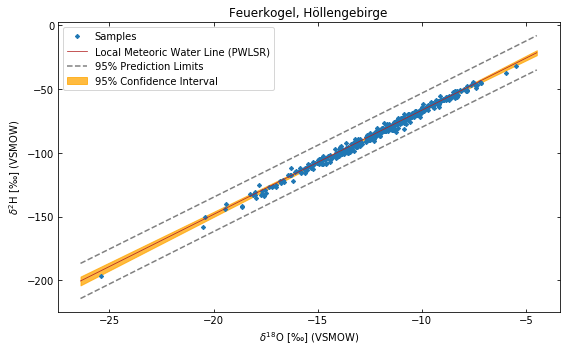

In [8]:
#gnip.figure_LMWL(germany,'GARMISCH-PARTENKIRCHEN',filename="../fig/GNIP/garmisch_partenkirchen_LMWL.pdf",plot_title="Garmisch-Partenkirchen")
gnip.figure_LMWL(feuerkogel_long,'FEUERKOGEL',filename="../fig/GNIP/feuerkogel_Long_LMWL.pdf",plot_title="Feuerkogel, Höllengebirge")
#gnip.figure_LMWL(slov,'LJUBLJANA',filename="../fig/GNIP/ljubljana_LMWL.pdf",plot_title="Ljubljana")
#gnip.LMWL_plotter(austria,'VILLACHER ALPE',filename="../fig/GNIP/villacher_alpe_LWML.pdf",plot_title="Villacher Alpe")

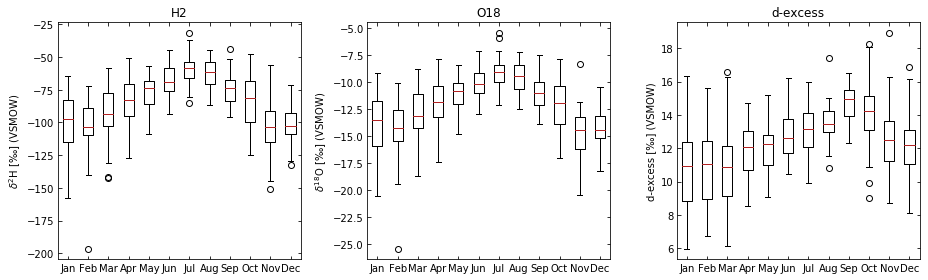

In [9]:
gnip.period_boxplot(feuerkogel_long,'FEUERKOGEL',
                    filename="../fig/GNIP/feuerkogel_long_monthly.pdf",
                    freq='m')
#gnip.period_boxplot(austria,'GRAZ (UNIVERSITAET)',
#                    filename='../fig/GNIP/graz_universitaet_boxplot_monthly.pdf',
#                    freq='m')
#gnip.period_boxplot(slov,'LJUBLJANA',
#                    filename="../fig/GNIP/ljubljana_monthly.pdf",
#                    freq='m')

In [10]:
#iso.crossPlotter(hundsalm,{'old ice 1':1,
#                         'old ice 2':2},
#                 filename="../fig/isotopes/ice_transect_Hundsalm.pdf")
#iso.crossPlotter(hundsalm,{'snow transect (April)':3,
#                           'snow transect (June)':4},
#                 filename="../fig/isotopes/snow_transect_Hundsalm.pdf")
# iso.crossPlotter(hundsalm,{'drips (June)':(-999,'DRIP'),
#                            'icicles (April and June)':(-999,'ICICLE')},
#                 filename="../fig/isotopes/icicle s_drips_transect_Hundsalm.pdf")

#iso.figureIsotopes(hundsalm,{'old ice 2':2,
#                           'icicles':(-999,'ICICLE'),
#                           'drips':(-999,'DRIP'),
#                           'snow in april':3,
#                           'snow in june':4},
#                 filename="../fig/isotopes/iso_samples_Hundsalm_full.pdf")

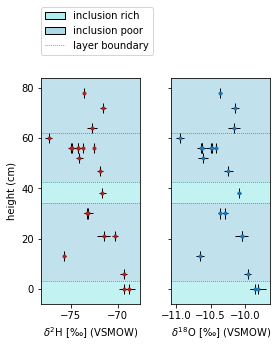

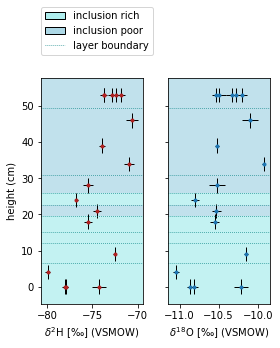

In [11]:
iso.transectPlotter(hundsalm,{"old ice":2},
                    filename="../fig/isotopes/transect_2.pdf")
iso.transectPlotter(hundsalm,{"old ice":1},
                    filename="../fig/isotopes/transect_1.pdf")

In [12]:
#iso.transectPlotter(hundsalm,{"old ice":2},
#                    filename="../fig/isotopes/transect_2.pdf")

In [13]:
#iso.figureIsotopes(hundsalm,{'old ice 1':1,
#                         'old ice 2':2},
#                 filename="../fig/isotopes/ice_transect_Hundsalm.pdf")

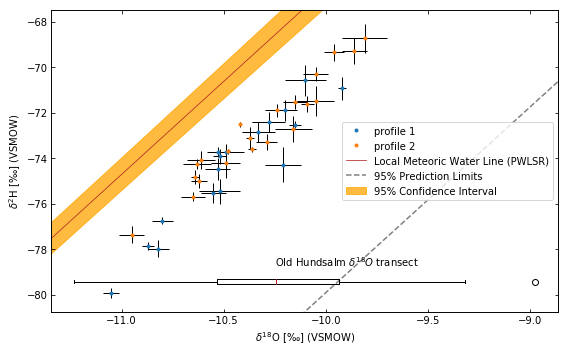

In [14]:
iso.full_plotter(hundsalm,
                 {"profile 1":1,"profile 2":2},
                 feuerkogel_long,
                 "FEUERKOGEL",
                 filename="../fig/isotopes/hundsalm_and_feuerkogel_isotopes.pdf",df_old = hundsalm_old,loc='right')

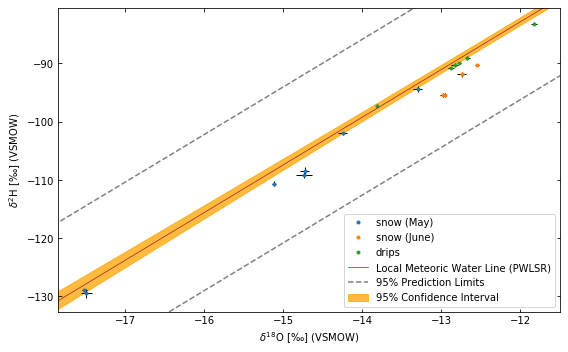

In [15]:
iso.full_plotter(hundsalm,
                 {"snow (May)":3,"snow (June)":4,"drips":(-999,'DRIP')},
                 feuerkogel_long,
                 "FEUERKOGEL",
                 filename="../fig/isotopes/hundsalm_and_feuerkogel_isotopes_snow.pdf",loc='best')

In [16]:
hundsalm['d-excess']= hundsalm['d2H']-8*hundsalm["d18O"]

In [17]:
iso.get_stats(hundsalm,{'drips':(-999,'DRIP')})

,$\delta^{18}$O drips,$\delta^{2}$H drips,d-excess drips
maxi,-11.829109,-83.221898,13.258146
mean,-12.797416,-90.084456,12.294874
median,-12.799741,-90.148080,12.273260
mini,-13.813208,-97.247515,11.410972
std.,0.631330,4.473193,0.587050


In [18]:
iso.get_stats(hundsalm,{'congelation ice':(-999,'ICICLE')})

,$\delta^{18}$O congelation ice,$\delta^{2}$H congelation ice,d-excess congelation ice
maxi,-9.204976,-64.646793,10.690000
mean,-10.053271,-70.509614,9.916552
median,-10.142303,-71.053529,9.970000
mini,-10.328922,-73.195582,8.993012
std.,0.346924,2.532217,0.541060


In [19]:
iso.get_stats(hundsalm,{'snow (june)':4})

,$\delta^{18}$O snow (june),$\delta^{2}$H snow (june),d-excess snow (june)
maxi,-12.547687,-90.262840,10.118655
mean,-12.793266,-92.997888,9.348236
median,-12.743068,-91.917822,9.960765
mini,-12.982651,-95.451124,8.215795
std.,0.179861,2.335061,0.945322


In [20]:
#iso.get_stats(hundsalm,{'snow (may)':3})

In [21]:
iso.get_stats(hundsalm,{'transect 1':1})

,$\delta^{18}$O transect 1,$\delta^{2}$H transect 1,d-excess transect 1
maxi,-9.920000,-70.590000,10.520000
mean,-10.462941,-74.402941,9.300588
median,-10.520000,-73.910000,9.640000
mini,-11.050000,-79.920000,7.380000
std.,0.304544,2.586856,0.853101


In [22]:
iso.get_stats(hundsalm,{'transect 2':2})

,$\delta^{18}$O transect 2,$\delta^{2}$H transect 2,d-excess transect 2
maxi,-9.810000,-68.740000,10.850000
mean,-10.327619,-72.796190,9.824762
median,-10.360000,-73.120000,9.840000
mini,-10.950000,-77.360000,8.550000
std.,0.300631,2.219222,0.629028


In [23]:
dat= hundsalm_old["d18O"]
df= {'min':dat.min(),
    'median':dat.median(),
    'max':dat.max(),
    'mean':dat.mean(),
    'std':dat.std()}

df

{'max': -8.975790826061202,
 'mean': -10.203304964873832,
 'median': -10.24351426705239,
 'min': -11.230250830235313,
 'std': 0.46426729784858556}

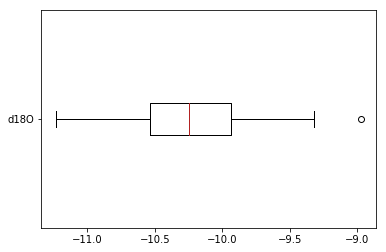

In [24]:
fig, ax= plt.subplots()
bp= hundsalm_old.boxplot(column=["d18O"], vert=False,ax= ax,return_type='both',grid=False,widths = 0.15)

[item.set_color('firebrick') for item in bp[1]['medians']]
[item.set_color('black') for item in bp[1]['boxes']]
[item.set_color('black') for item in bp[1]['whiskers']]

plt.show()

In [25]:
bp[1]

{'boxes': [<matplotlib.lines.Line2D at 0x1a1b21ba58>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1b10e8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1b5d4f98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1b10e400>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1b21b860>,
  <matplotlib.lines.Line2D at 0x1a1b10e518>]}

In [26]:
len(dat)

50

In [27]:
s1 = hundsalm.loc[(3,"SNOWPACK"), ['d18O','d2H']]
s2 = hundsalm.loc[(4,"SNOWPACK"), ['d18O','d2H']]
snow=s1.append(s2)
snow["d-excess"]=snow['d2H']-8*snow['d18O']

In [28]:
snow.std()

d18O         1.804307
d2H         14.221445
d-excess     1.205035
dtype: float64

In [29]:
def myTTest(a,b):
    ## Cross Checking with the internal scipy function
    t2, p2 = stats.ttest_ind(a,b)
    print("t = " + str(t2))
    print("p = " + str(p2))
    return t2,p2
    



In [30]:
myTTest(hundsalm.loc[(-999,"DRIP"),['d2H']].values,snow['d2H'].values)
myTTest(hundsalm.loc[(-999,"DRIP"),['d18O']].values,snow['d18O'].values)
myTTest(hundsalm.loc[(-999,"DRIP"),['d-excess']].values,snow['d-excess'].values)

t = [2.64436016]
p = [0.0192398]
t = [2.26143613]
p = [0.04017753]
t = [3.81573029]
p = [0.00189116]


(array([3.81573029]), array([0.00189116]))

In [31]:
myTTest(hundsalm.loc[(-999,"ICICLE"),['d2H']].values,snow['d2H'].values)
myTTest(hundsalm.loc[(-999,"ICICLE"),['d18O']].values,snow['d18O'].values)
myTTest(hundsalm.loc[(-999,"ICICLE"),['d-excess']].values,snow['d-excess'].values)

t = [7.37775484]
p = [1.07950004e-06]
t = [7.32435298]
p = [1.18762436e-06]
t = [-0.80671219]
p = [0.43097432]


(array([-0.80671219]), array([0.43097432]))

In [32]:
myTTest(hundsalm.loc[(-999,"ICICLE"),['d2H']].values,hundsalm.loc[(-999,"DRIP"),['d2H']].values)
myTTest(hundsalm.loc[(-999,"ICICLE"),['d18O']].values,hundsalm.loc[(-999,"DRIP"),['d18O']].values)
myTTest(hundsalm.loc[(-999,"ICICLE"),['d-excess']].values,hundsalm.loc[(-999,"DRIP"),['d-excess']].values)

t = [10.88524514]
p = [6.66749107e-08]
t = [10.91936419]
p = [6.42570592e-08]
t = [-8.06970411]
p = [2.03328754e-06]


(array([-8.06970411]), array([2.03328754e-06]))

In [33]:
myTTest(hundsalm.loc[2,['d18O']].values,hundsalm.loc[1,['d18O']].values)

t = [1.37171288]
p = [0.1786418]


(array([1.37171288]), array([0.1786418]))

In [34]:
myTTest(hundsalm.loc[2,['d2H']].values,hundsalm.loc[1,['d2H']].values)

t = [2.0609348]
p = [0.04658966]


(array([2.0609348]), array([0.04658966]))

In [35]:
myTTest(hundsalm.loc[2,['d-excess']].values,hundsalm.loc[1,['d-excess']].values)

t = [2.17974827]
p = [0.03589742]


(array([2.17974827]), array([0.03589742]))

In [36]:
myTTest(hundsalm.loc[2,['d18O']].values,hundsalm_old['d18O'].values)

t = [-1.12911659]
p = [0.26275895]


(array([-1.12911659]), array([0.26275895]))

In [37]:
myTTest(hundsalm.loc[1,['d18O']].values,hundsalm_old['d18O'].values)

t = [-2.14822375]
p = [0.03542775]


(array([-2.14822375]), array([0.03542775]))

In [38]:
group1=hundsalm.loc[1,['d18O']].values
group2=hundsalm.loc[2,['d18O']].values
group3=hundsalm.loc[(-999,'DRIP'),['d18O']].values
group4=hundsalm.loc[(-999,'ICICLE'),['d18O']].values


F_statistic, pVal = stats.f_oneway(group1, group2, group3, group4)

print ('P value:')
print (pVal)
dat = {'ice 1':[group1],
       'ice 2':[group2],
       'drip':[group3],
       'icicle':[group4]}

data = pd.DataFrame.from_dict(dat)

P value:
[1.04507754e-19]


In [39]:
stats.kruskal(group1, group2, group3, group4)

KruskalResult(statistic=21.48720463224607, pvalue=8.338769032630413e-05)

In [40]:
group1=hundsalm.loc[1,['d2H']].values
group2=hundsalm.loc[2,['d2H']].values
group3=hundsalm.loc[(-999,'DRIP'),['d2H']].values
group4=hundsalm.loc[(-999,'ICICLE'),['d2H']].values

In [41]:
stats.kruskal(group1, group2, group3, group4)

KruskalResult(statistic=24.77749198910874, pvalue=1.7186080468808467e-05)

In [42]:
group1=hundsalm.loc[1,['d-excess']].values
group2=hundsalm.loc[2,['d-excess']].values
group3=hundsalm.loc[(-999,'DRIP'),['d-excess']].values
group4=hundsalm.loc[(-999,'ICICLE'),['d-excess']].values

In [43]:
stats.kruskal(group1, group2, group3, group4)

KruskalResult(statistic=19.173825882407172, pvalue=0.00025167968583762377)

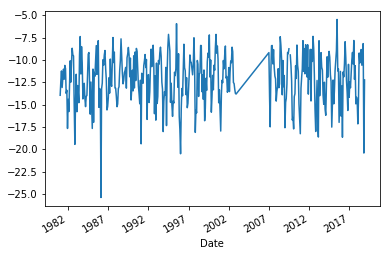

In [44]:
feuerkogel_long.loc["FEUERKOGEL",'O18'].plot()